In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# checking for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

The is no null value as the code is showing, but those `?` are not information, and i will consider those value as `null`

In [5]:
df.replace(to_replace='?', value=np.nan, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
# again checking for null values
print(df.shape)
df.isnull().sum()

(32561, 15)


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
# checki the percentage of null values
print(f'The percentage of null values in total: {round((1843/32561)*100, 2)} %')

The percentage of null values in total: 5.66 %


Now the rule says i can drop null values row if the percentage is equal to ot lessthat `5%`, but here the rule is almost satisfying, also i can't fill those by any `fillna` methode, the null values are present on the `workclass`, `occupation`, and `native-country`, althoug i can assume the `country` but the other two will be wron information if i put `most-frequnt` or other null value methode. 

I will just drop those rows.

In [8]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Ok fine

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [10]:
# checking the target column `income`
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

The income column or my target column has imbalanced data. most of the people are make money of less than `50k`

Encoding the target labels

`<=50K` will be `0`

`>50K` will be `1`

In [16]:
# income = df['income'].map({'<=50K':0, '>50K':1}) # converting the vlaues
# df['income'] = income #replacingt the column with new series
# df.head() # checking the head

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


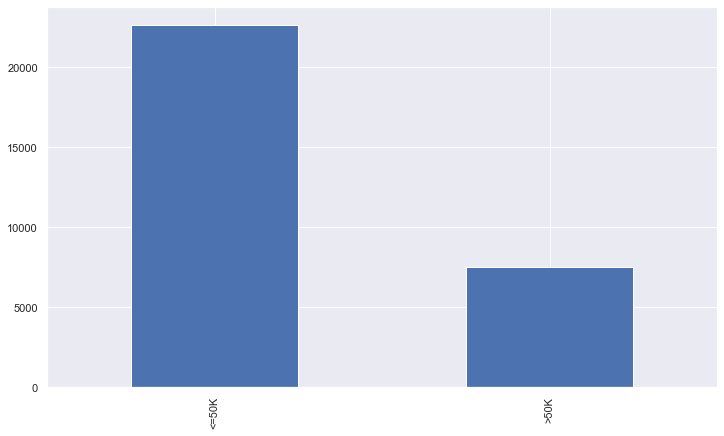

In [11]:
# checking for sucessfully encoding the labels
plt.rcParams['figure.figsize']=(12,7)
df['income'].value_counts().plot(kind='bar');

### First I will walkthroug on Categorical columns

## `Workclss` Column

In [12]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [20]:
# creating function to plot categorical columns
def cat_plot(col,hue_label=None):
    fig, ax1 = plt.subplots(figsize=(20,10))
    graph = sns.countplot(ax=ax1,x=col, data=df,hue=hue_label);
    plt.xlabel(col, fontsize=15);
    plt.ylabel('Count', fontsize=15);
    graph.set_xticklabels(graph.get_xticklabels(),rotation=90, fontdict={'fontsize': 15, 
                                                                       'horizontalalignment':'center'});
    for p in graph.patches:
        height = p.get_height();
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontdict={'fontsize': 16, 
                                                                       'horizontalalignment':'center'});

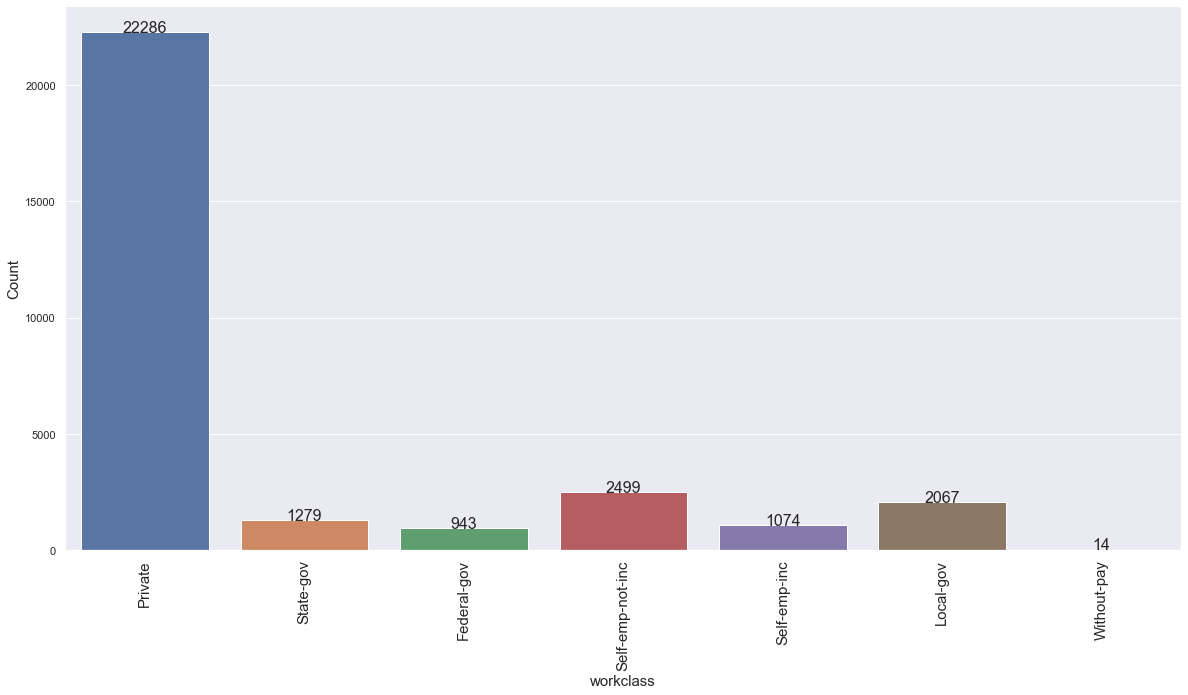

In [21]:
# plotting worklclass column
cat_plot('workclass')

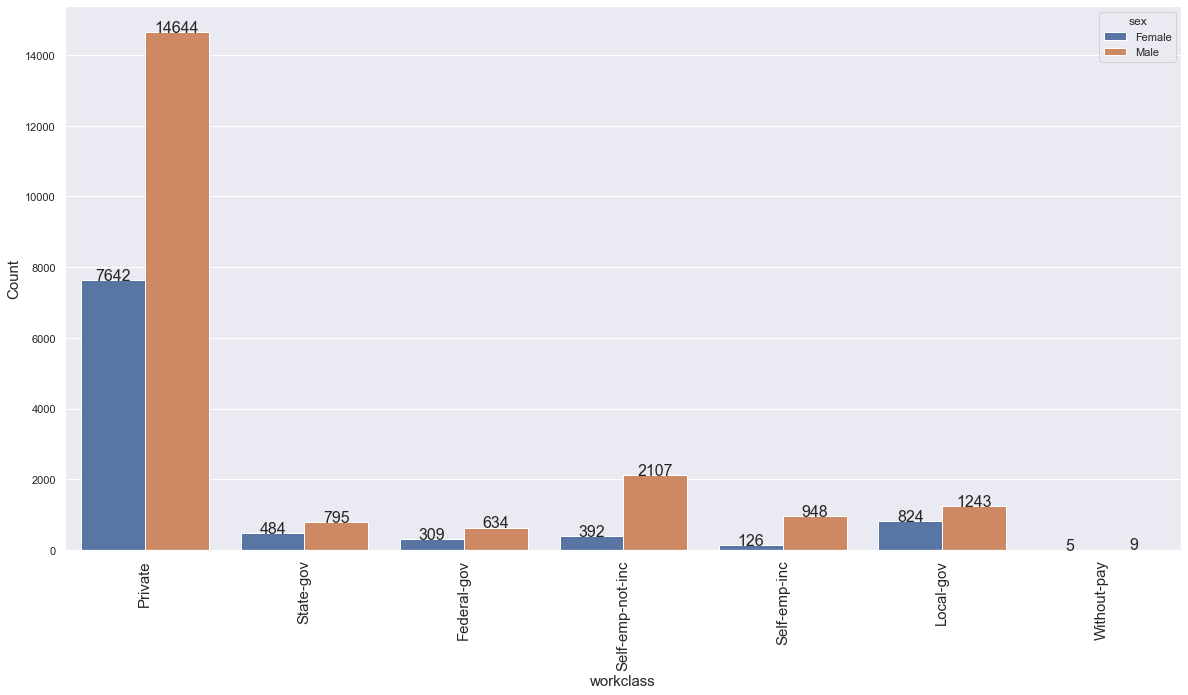

In [15]:
# plotting worklclass column with hue gender
cat_plot('workclass', hue_label='sex')

posx and posy should be finite values
posx and posy should be finite values


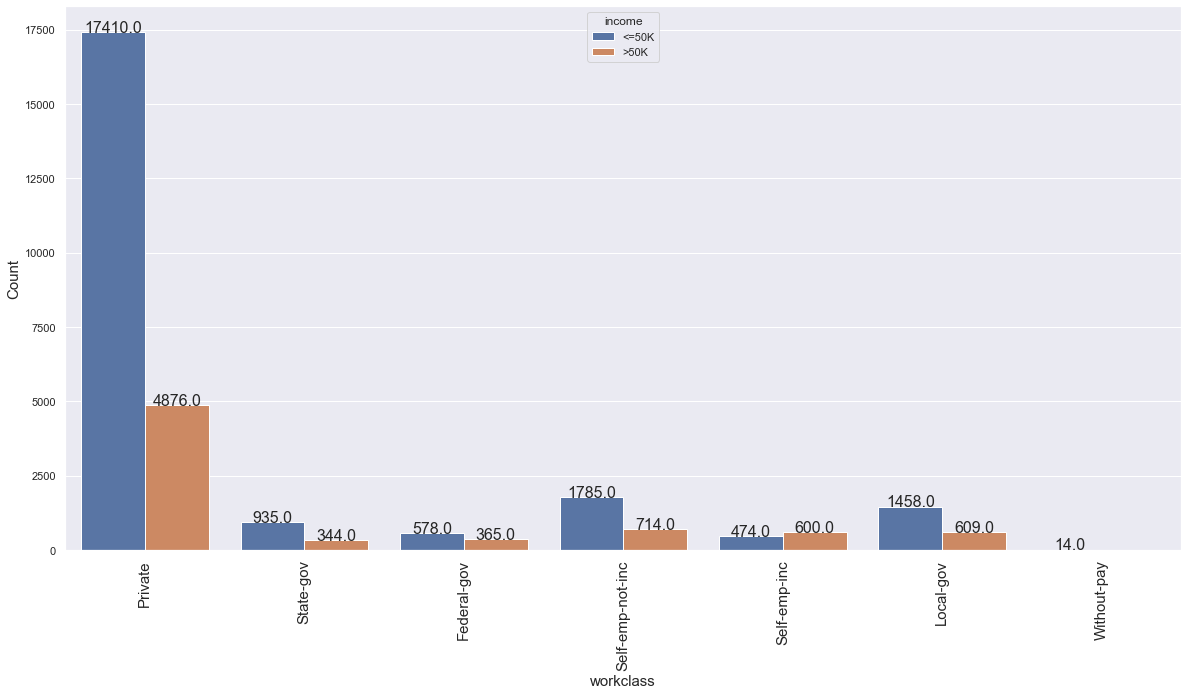

In [22]:
cat_plot('workclass', hue_label='income')

Most of the people are doing `Private` job, and that is obvious, but the number is comparetevly very high than others.

## `education` column

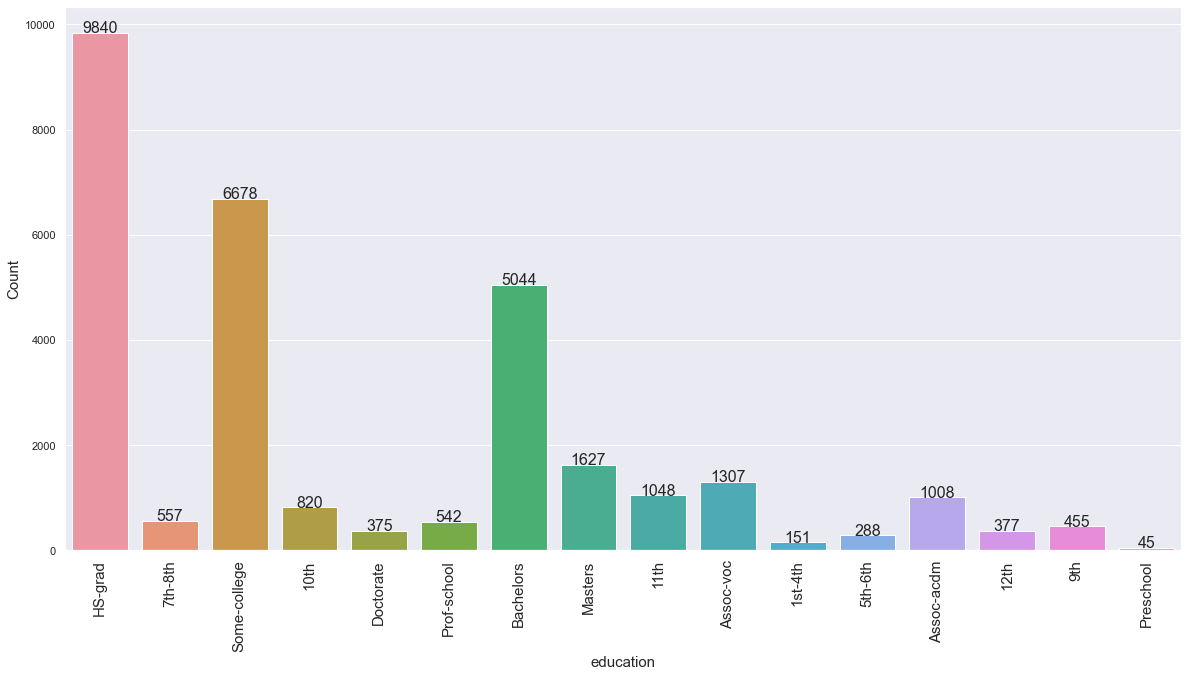

In [23]:
# print(df['education'].value_counts())
cat_plot('education')

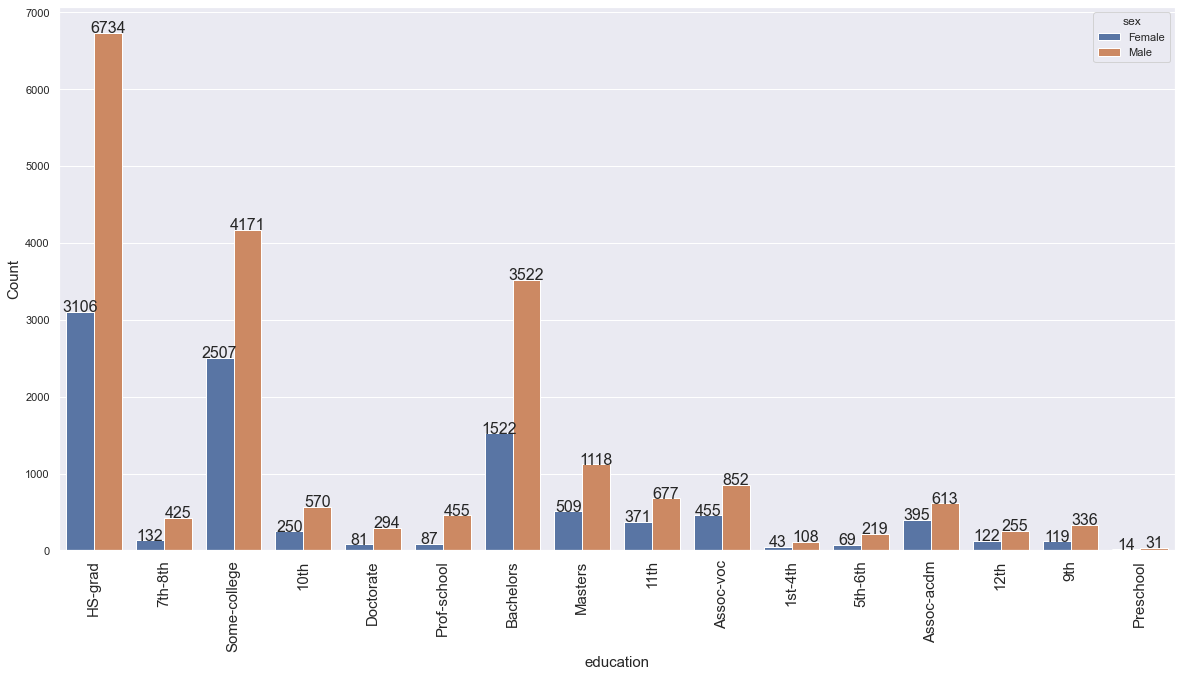

In [24]:
# print(df['education'].value_counts())
cat_plot('education', hue_label='sex')

posx and posy should be finite values
posx and posy should be finite values


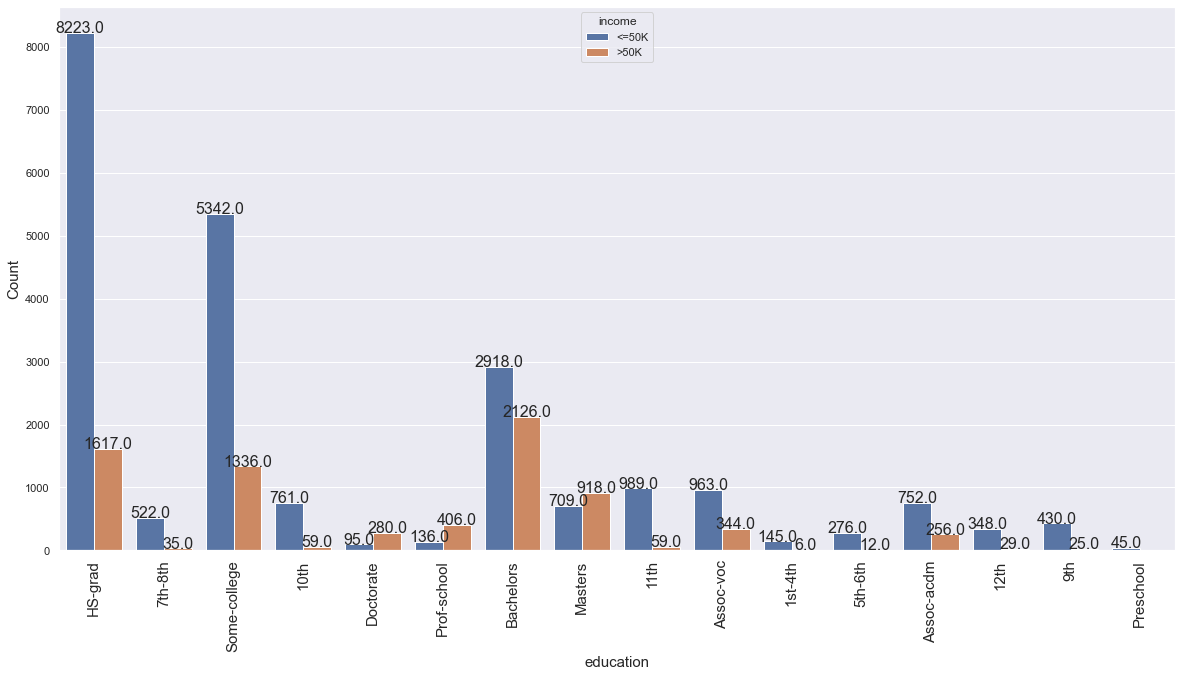

In [25]:
# checking on income
cat_plot('education',hue_label='income')

Most of the people hase only `HS` school degree and the second highest is `college`, mean those people have college degree of some domain. And almost all the time `male` have greater education than `female`

## `marital.status` columns

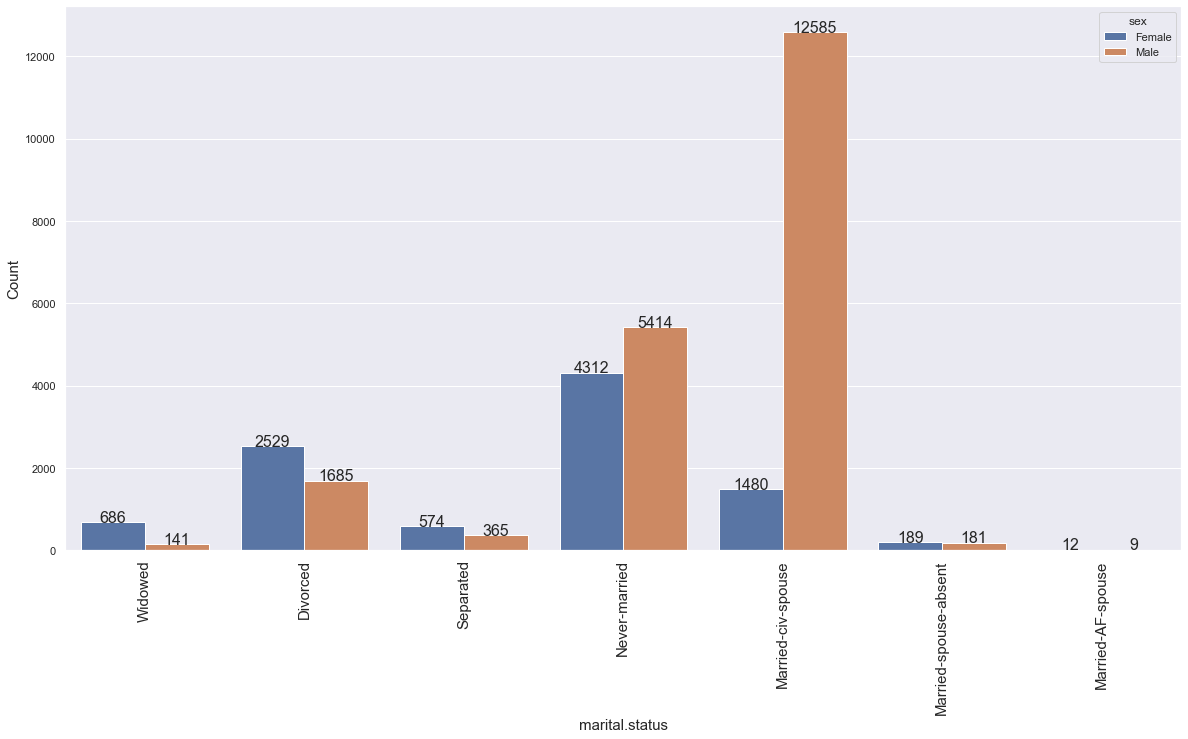

In [80]:
# potting mati=erialstatus column
cat_plot('marital.status', hue_label='sex')

Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.

## `occupation` Column

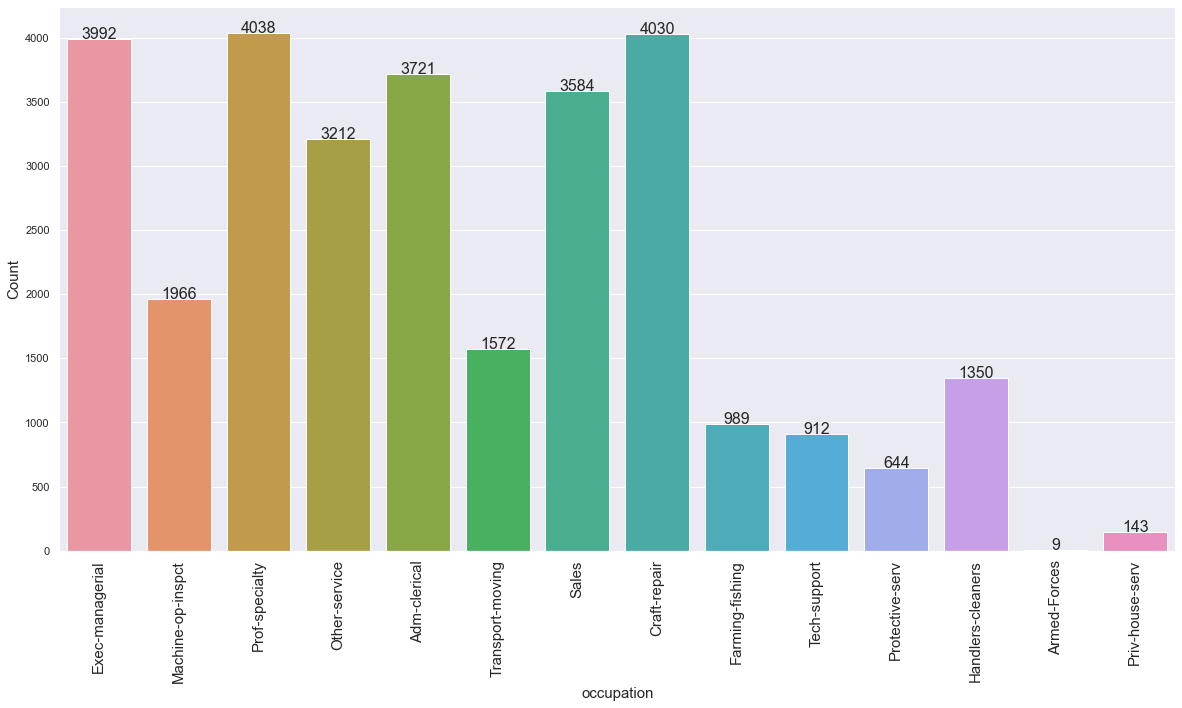

In [26]:
# plotting occupation column
cat_plot('occupation',)

posx and posy should be finite values
posx and posy should be finite values


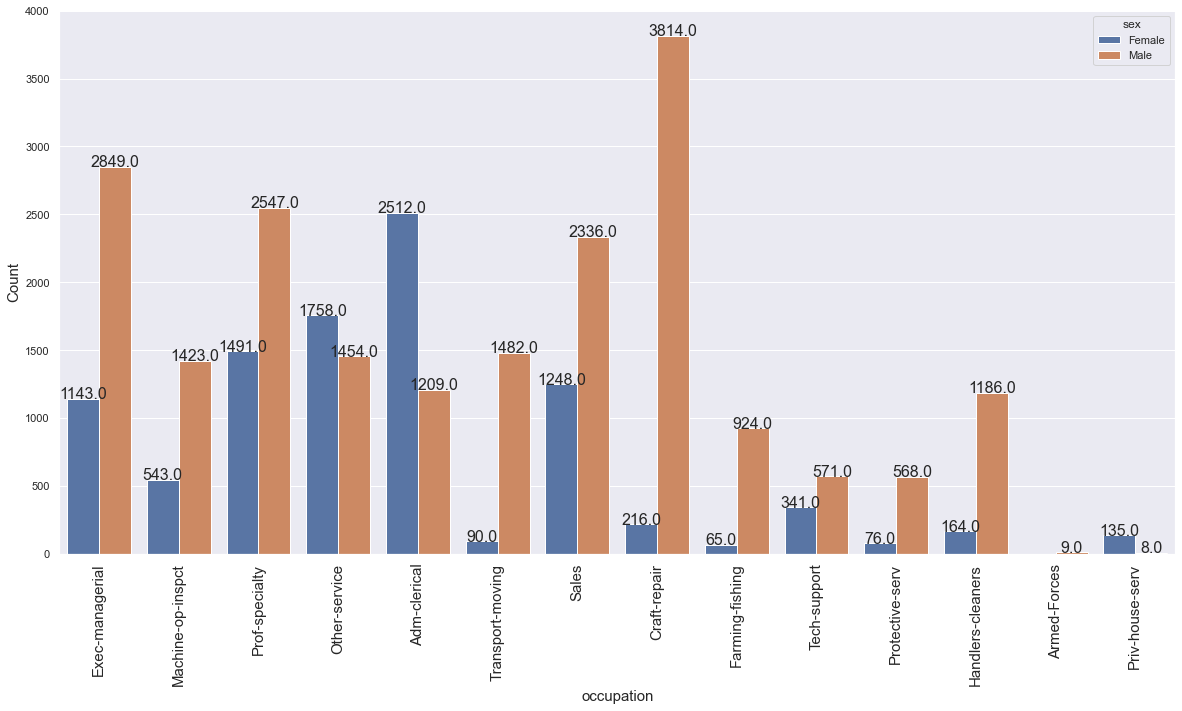

In [27]:
#plotting occupation with gender
cat_plot('occupation',hue_label='sex')

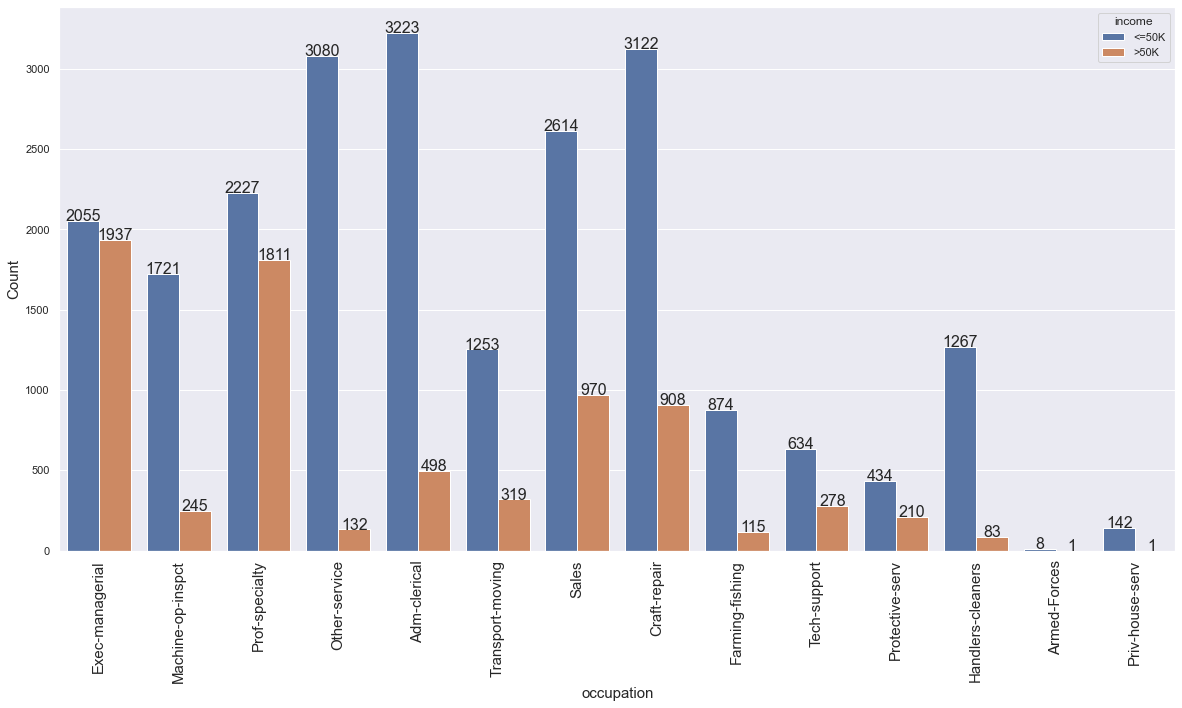

In [28]:
# plotting occupation with income
cat_plot('occupation',hue_label='income')

## `relationship` column

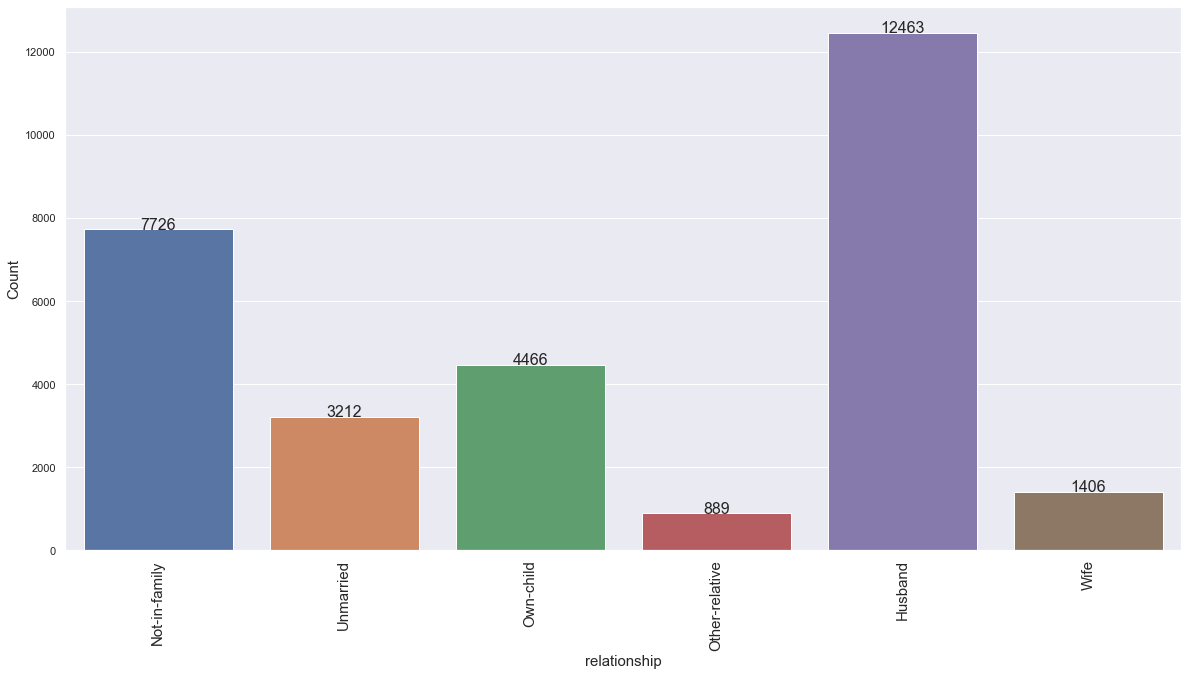

In [29]:
# plottng relationship 
cat_plot('relationship')

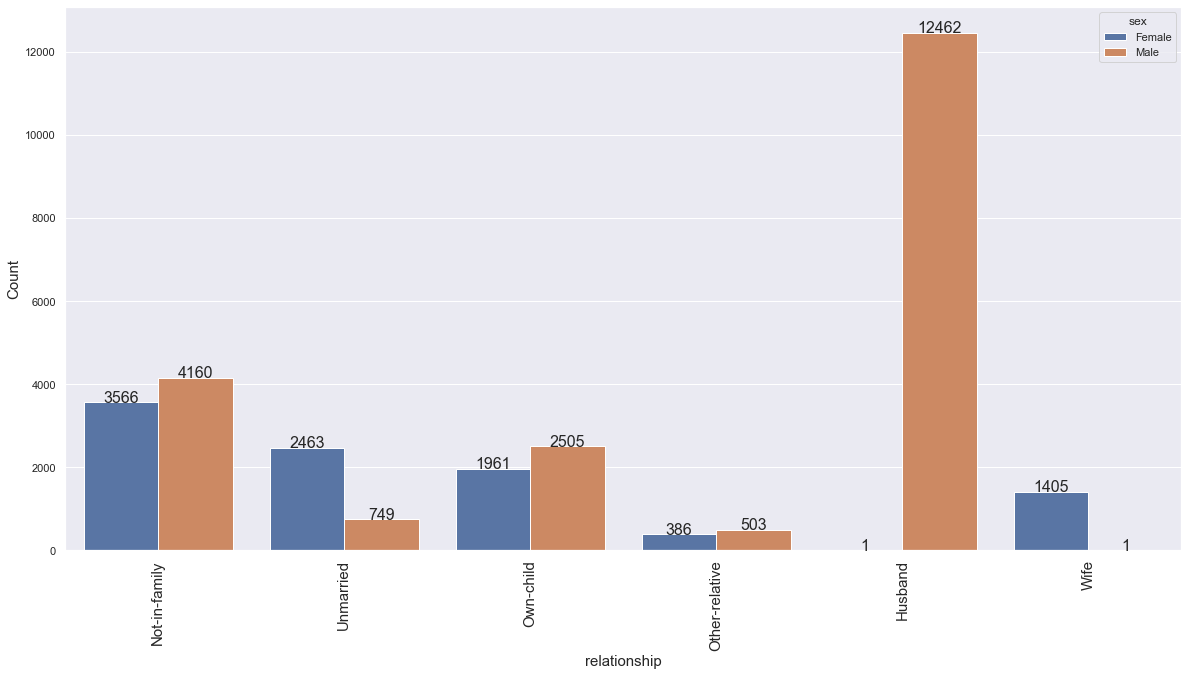

In [30]:
cat_plot('relationship', hue_label='sex')

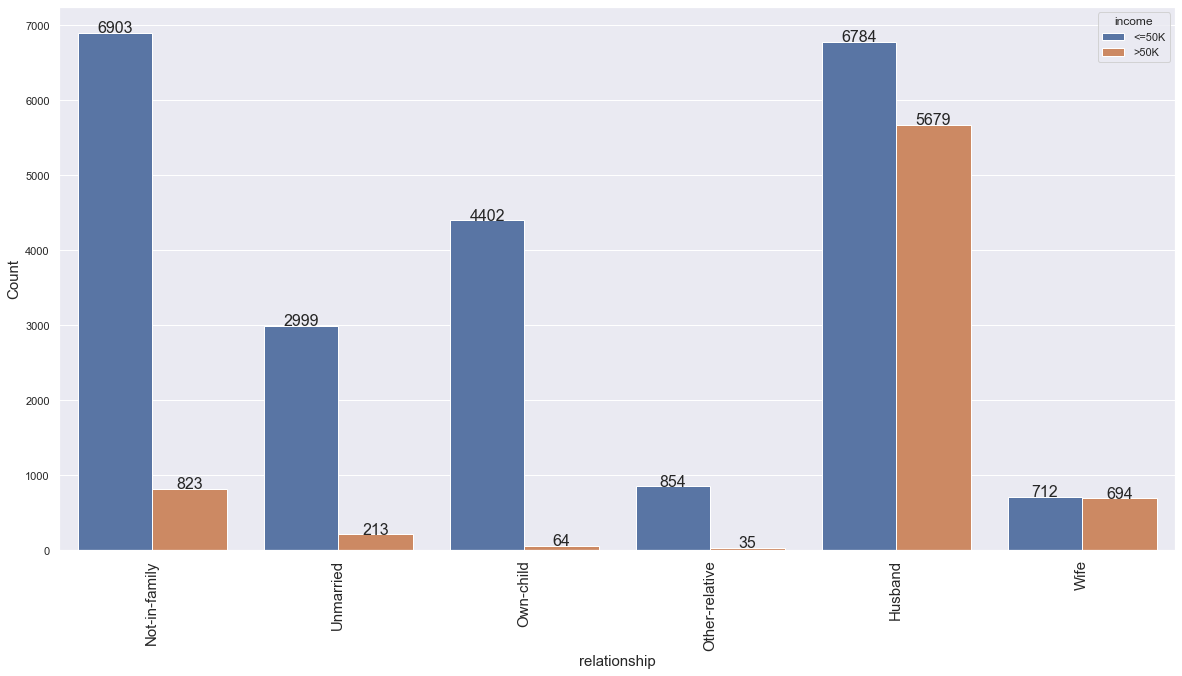

In [31]:
cat_plot('relationship', hue_label='income')

## `race` column

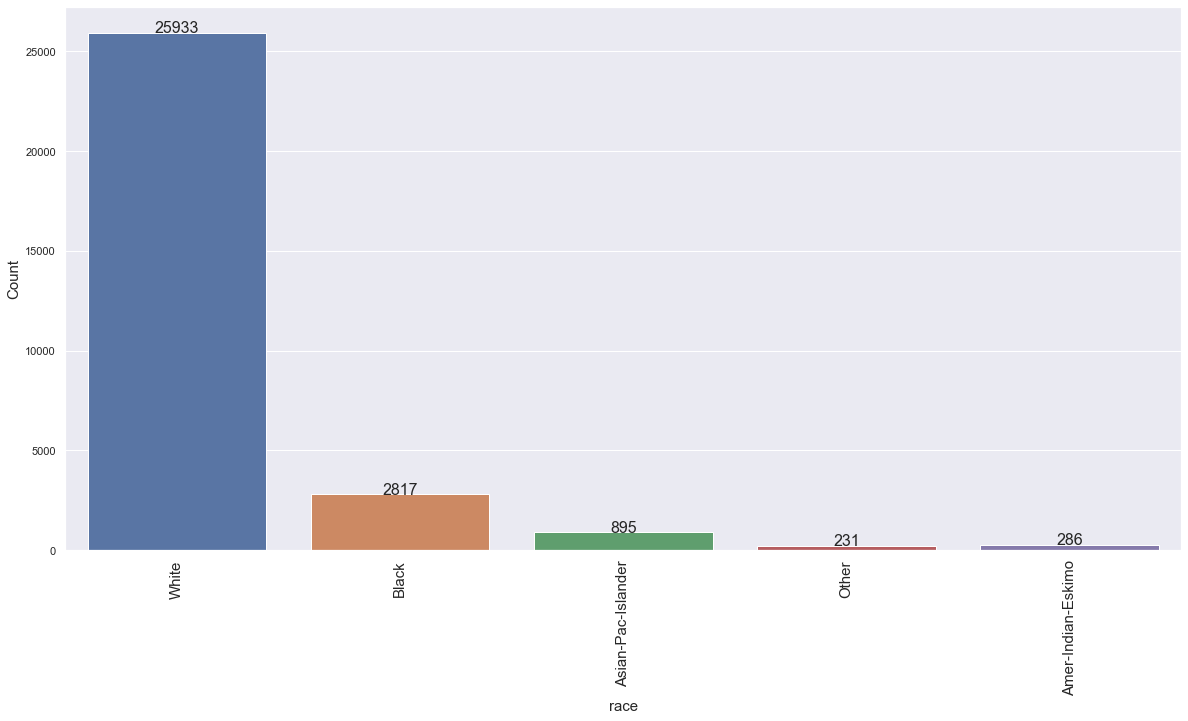

In [32]:
# plotting race column
cat_plot('race')

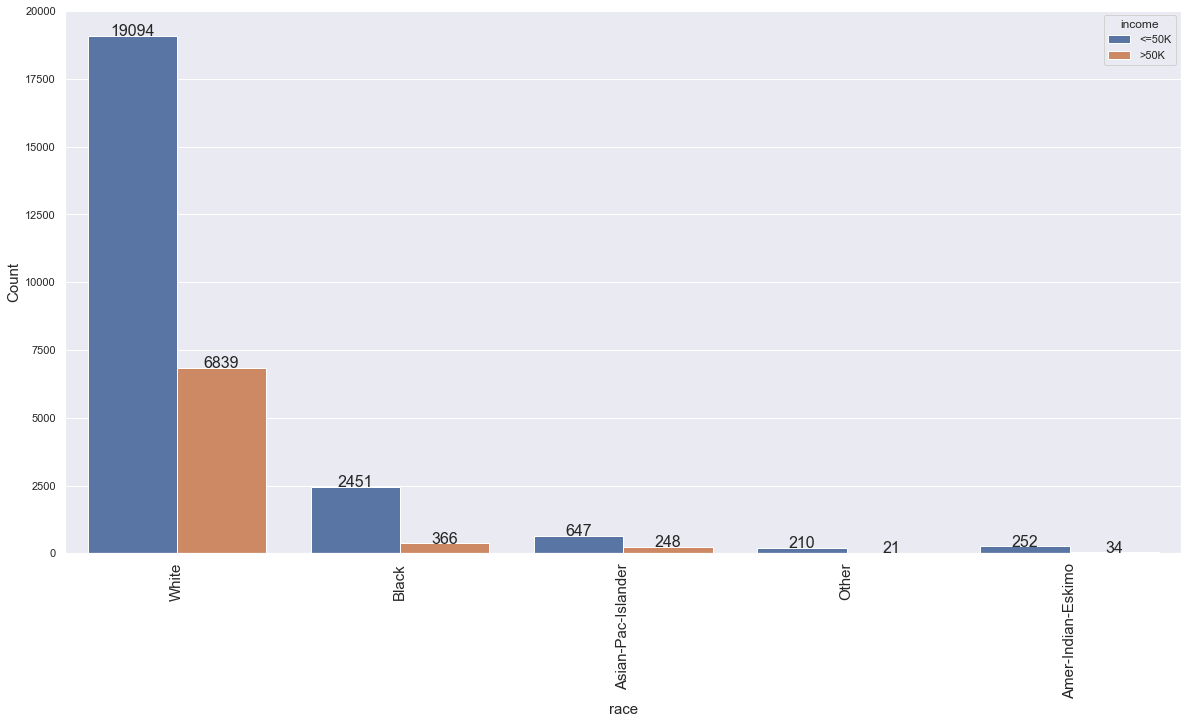

In [34]:
cat_plot('race', hue_label='income')

## `sex` column

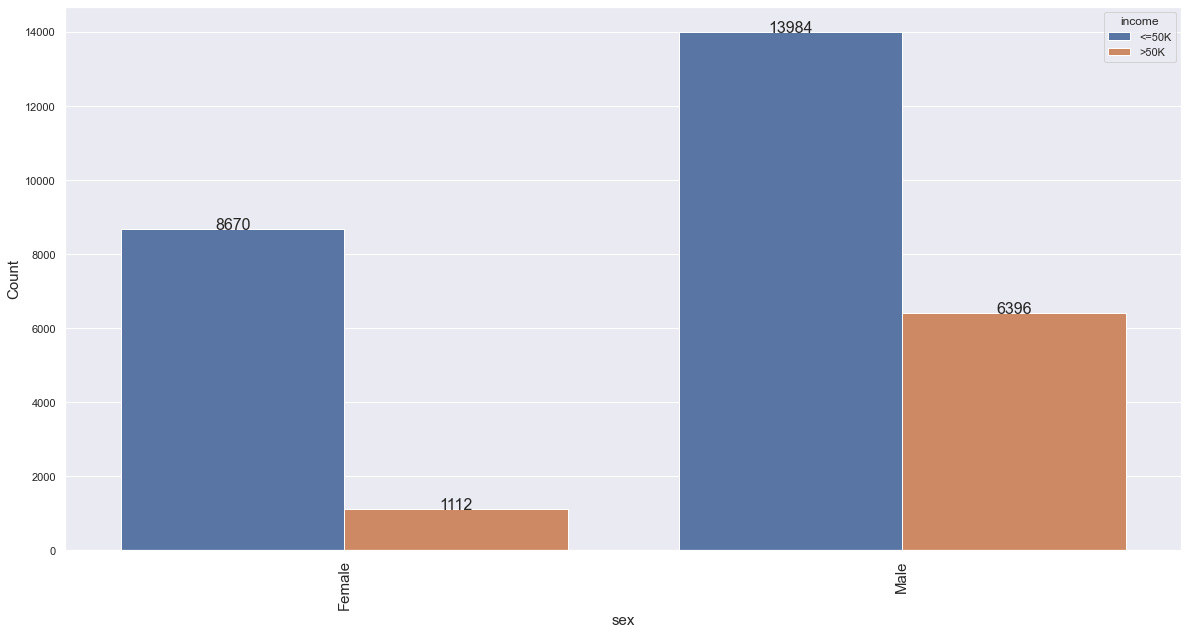

In [37]:
# plotting gender column
cat_plot('sex', hue_label='income')

## `	native.country	` column

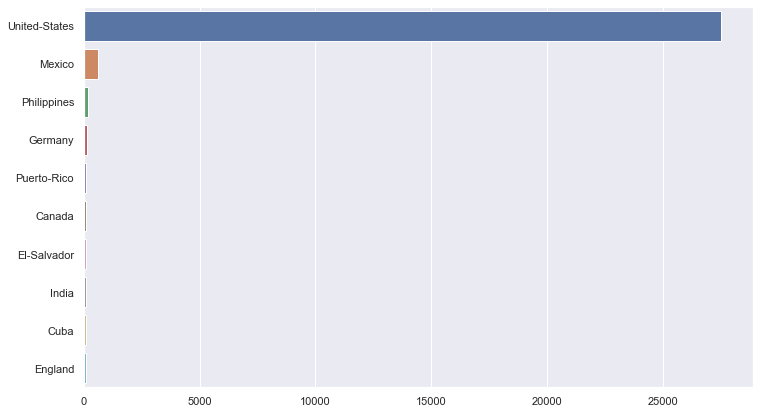

In [51]:
c = df['native.country'].value_counts()[:10]
sns.barplot(x=c.values, y=c.keys());

## Numericla Columns

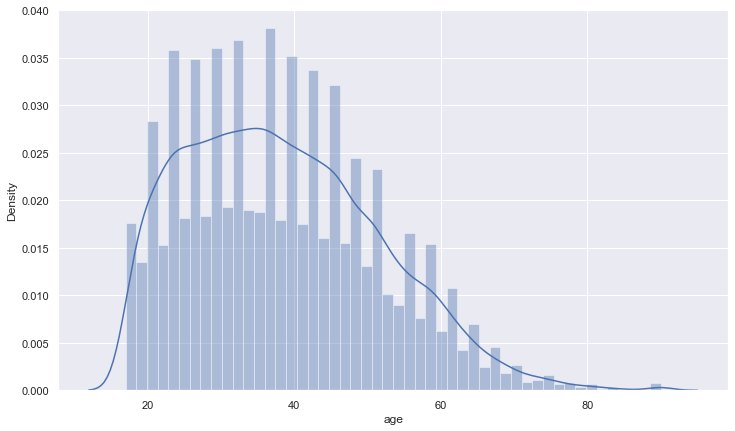

In [55]:
sns.distplot(df['age']);